Pertama-tama, data dari file CSV dimuat menggunakan pandas. Load CSV disertai argumen ```names``` untuk memberikan nama ke masing-masing kolom sesuai spesifikasi.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import iqr, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("Gandum.csv", names=["id", "Daerah", "SumbuUtama", "SumbuKecil", "Keunikan", "AreaBulatan", "Diameter", "KadarAir", "Keliling", "Bulatan", "Ransum", "Kelas"])
df

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,5083,120.083450,54.821580,0.889709,5179,80.447975,0.534827,286.377,0.778850,2.190441,2
496,497,4432,112.367050,51.294914,0.889726,4550,75.119889,0.601194,270.823,0.759344,2.190608,2
497,498,5020,119.873742,54.718545,0.889740,5104,79.947874,0.528421,285.799,0.772311,2.190733,2
498,499,4035,107.311728,48.930802,0.889996,4150,71.676506,0.584698,258.503,0.758791,2.193132,2


Terdapat 500 baris dan 12 kolom yang menandakan jumlah data (n) sebanyak 500 dan jumlah kolom data sebanyak 12.

Selanjutnya, tipe data masing-masing kolom akan dicek untuk menentukan kolom mana saja yang numerik.

In [2]:
df.dtypes

id               int64
Daerah           int64
SumbuUtama     float64
SumbuKecil     float64
Keunikan       float64
AreaBulatan      int64
Diameter       float64
KadarAir       float64
Keliling       float64
Bulatan        float64
Ransum         float64
Kelas            int64
dtype: object

Diketahui tipe data seluruh kolom adalah numerik (int64 atau float64). Oleh karena itu, dapat dilakukan deskripsi statistika di seluruh kolom data.

Sebelum ke deskripsi, akan dicek terlebih dahulu keberadaan missing values (NaN) pada data.

In [3]:
df.isnull().sum()

id             0
Daerah         0
SumbuUtama     0
SumbuKecil     0
Keunikan       0
AreaBulatan    0
Diameter       0
KadarAir       0
Keliling       0
Bulatan        0
Ransum         0
Kelas          0
dtype: int64

Tidak terdapat missing values pada data. Oleh karena itu tidak perlu dilakukan penanganan khusus bagi data NaN.

# Nomor 1

Menulis deskripsi statistika dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.

Gambaran umum data dapat dicari dengan method ```describe```

In [4]:
df.describe()

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,4801.246000,116.045171,53.715246,0.878764,4937.048000,77.771158,0.648372,281.479722,0.761737,2.150915,1.502000
std,144.481833,986.395491,18.282626,4.071075,0.036586,1011.696255,8.056867,0.094367,37.335402,0.061702,0.249767,0.500497
min,1.000000,2522.000000,74.133114,39.906517,0.719916,2579.000000,56.666658,0.409927,197.015000,0.174590,1.440796,1.000000
25%,125.750000,4042.750000,104.116098,51.193576,0.863676,4170.250000,71.745308,0.572632,255.883000,0.731991,1.983939,1.000000
50%,250.500000,4735.000000,115.405140,53.731199,0.890045,4857.000000,77.645277,0.626117,280.045500,0.761288,2.193599,2.000000
75%,375.250000,5495.500000,129.046792,56.325158,0.907578,5654.250000,83.648598,0.726633,306.062500,0.796361,2.381612,2.000000
max,500.000000,7453.000000,227.928583,68.977700,0.914001,7720.000000,97.413830,0.878899,488.837000,0.904748,2.464809,2.000000


Dari hasil tersebut sudah dapat terlihat beberapa statistik data seperti mean, standar deviasi, nilai minimum, nilai maksimum, dan kuartil.

Berikutnya akan dilihat statistik masing-masing kolom atribut mulai dari kolom "Daerah" hingga kolom "Ransum".

In [5]:
def descriptive_statistics(df):
    print("Mean:", df.mean())
    print("Median:", df.median())
    print("Modus:", df.mode("index")[0])
    print("Standar Deviasi:", df.std())
    print("Variansi:", df.var())
    print("Range:", df.max()-df.min())
    print("Nilai Minimum:", df.min())
    print("Nilai Maksimum:", df.max())
    print("Kuartil pertama:", df.quantile(0.25))
    print("Kuartil kedua:", df.quantile(0.5))
    print("Kuartil ketiga:", df.quantile(0.75))
    print("Interquartile Range:", iqr(df))
    print("Skewness:", df.skew())
    print("Kurtosis:", df.kurtosis())

### Daerah

Deskripsi Statistika untuk Kolom Daerah

In [6]:
descriptive_statistics(df["Daerah"])

Mean: 4801.246
Median: 4735.0
Modus: 3992
Standar Deviasi: 986.3954914816018
Variansi: 972976.0656152307
Range: 4931
Nilai Minimum: 2522
Nilai Maksimum: 7453
Kuartil pertama: 4042.75
Kuartil kedua: 4735.0
Kuartil ketiga: 5495.5
Interquartile Range: 1452.75
Skewness: 0.23814408738280812
Kurtosis: -0.4346305340273977


### SumbuUtama

Deskripsi Statistika untuk Kolom SumbuUtama

In [7]:
descriptive_statistics(df["SumbuUtama"])

Mean: 116.04517136778003
Median: 115.40513994999999
Modus: 74.13311404
Standar Deviasi: 18.28262595755936
Variansi: 334.25441190402336
Range: 153.79546865999998
Nilai Minimum: 74.13311404
Nilai Maksimum: 227.9285827
Kuartil pertama: 104.11609817499999
Kuartil kedua: 115.40513994999999
Kuartil ketiga: 129.046792025
Interquartile Range: 24.93069385000001
Skewness: 0.7615287378076631
Kurtosis: 4.330533548436968


### SumbuKecil

Deskripsi Statistika untuk Kolom SumbuKecil

In [8]:
descriptive_statistics(df["SumbuKecil"])

Mean: 53.71524598896002
Median: 53.731198774999996
Modus: 39.90651744
Standar Deviasi: 4.071074752475035
Variansi: 16.573649640239662
Range: 29.071182429999993
Nilai Minimum: 39.90651744
Nilai Maksimum: 68.97769987
Kuartil pertama: 51.1935763325
Kuartil kedua: 53.731198774999996
Kuartil ketiga: 56.3251579825
Interquartile Range: 5.131581650000001
Skewness: -0.010828051555611359
Kurtosis: 0.47556845043813656


### Keunikan

Deskripsi Statistika untuk Kolom Keunikan

In [9]:
descriptive_statistics(df["Keunikan"])

Mean: 0.878763914340001
Median: 0.8900454185
Modus: 0.7199162259999999
Standar Deviasi: 0.03658590550477702
Variansi: 0.0013385284816044736
Range: 0.19408517999999997
Nilai Minimum: 0.7199162259999999
Nilai Maksimum: 0.9140014059999999
Kuartil pertama: 0.8636757527500001
Kuartil kedua: 0.8900454185
Kuartil ketiga: 0.907577917
Interquartile Range: 0.04390216424999993
Skewness: -1.6234718222806501
Kurtosis: 2.917255925694389


### AreaBulatan

Deskripsi Statistika untuk Kolom AreaBulatan

In [10]:
descriptive_statistics(df["AreaBulatan"])

Mean: 4937.048
Median: 4857.0
Modus: 3802
Standar Deviasi: 1011.6962549701573
Variansi: 1023529.3123206415
Range: 5141
Nilai Minimum: 2579
Nilai Maksimum: 7720
Kuartil pertama: 4170.25
Kuartil kedua: 4857.0
Kuartil ketiga: 5654.25
Interquartile Range: 1484.0
Skewness: 0.2575600053152032
Kurtosis: -0.40968492037366033


### Diameter

Deskripsi Statistika untuk Kolom Diameter

In [11]:
descriptive_statistics(df["Diameter"])

Mean: 77.77115780832005
Median: 77.64527658
Modus: 71.29356396
Standar Deviasi: 8.056867291849715
Variansi: 64.91311055847777
Range: 40.747172240000005
Nilai Minimum: 56.66665803
Nilai Maksimum: 97.41383027
Kuartil pertama: 71.74530754749999
Kuartil kedua: 77.64527658
Kuartil ketiga: 83.6485975675
Interquartile Range: 11.903290020000014
Skewness: 0.002724966865193717
Kurtosis: -0.4664545130312141


### KadarAir

Deskripsi Statistika untuk Kolom KadarAir

In [12]:
descriptive_statistics(df["KadarAir"])

Mean: 0.6483716718980002
Median: 0.626116699
Modus: 0.735849057
Standar Deviasi: 0.0943670980937953
Variansi: 0.008905149202643984
Range: 0.46897193099999995
Nilai Minimum: 0.409927152
Nilai Maksimum: 0.878899083
Kuartil pertama: 0.57263245725
Kuartil kedua: 0.626116699
Kuartil ketiga: 0.7266333445000001
Interquartile Range: 0.15400088725000005
Skewness: 0.49366131797330265
Kurtosis: -0.7403261705867821


### Keliling

Deskripsi Statistika untuk Kolom Keliling

In [13]:
descriptive_statistics(df["Keliling"])

Mean: 281.479722
Median: 280.04549999999995
Modus: 197.015
Standar Deviasi: 37.335401715143995
Variansi: 1393.9322212311772
Range: 291.822
Nilai Minimum: 197.015
Nilai Maksimum: 488.837
Kuartil pertama: 255.88299999999998
Kuartil kedua: 280.04549999999995
Kuartil ketiga: 306.0625
Interquartile Range: 50.17950000000002
Skewness: 0.7336269072005543
Kurtosis: 2.272684731245571


### Bulatan

Deskripsi Statistika untuk Kolom Bulatan

In [14]:
descriptive_statistics(df["Bulatan"])

Mean: 0.7617374363080005
Median: 0.7612884395
Modus: 0.174590178
Standar Deviasi: 0.0617024607867326
Variansi: 0.0038071936671382743
Range: 0.7301581349999999
Nilai Minimum: 0.174590178
Nilai Maksimum: 0.9047483129999999
Kuartil pertama: 0.731990728
Kuartil kedua: 0.7612884395
Kuartil ketiga: 0.79636096975
Interquartile Range: 0.06437024175000006
Skewness: -3.5992367663616407
Kurtosis: 29.97509590463005


### Ransum

Deskripsi Statistika untuk Kolom Ransum

In [15]:
descriptive_statistics(df["Ransum"])

Mean: 2.150915331084002
Median: 2.1935990365
Modus: 1.440795615
Standar Deviasi: 0.24976688927065827
Variansi: 0.06238349897594127
Range: 1.0240129659999997
Nilai Minimum: 1.440795615
Nilai Maksimum: 2.4648085809999998
Kuartil pertama: 1.98393879075
Kuartil kedua: 2.1935990365
Kuartil ketiga: 2.38161221825
Interquartile Range: 0.3976734275
Skewness: -0.6581880925333653
Kurtosis: -0.4286557930626156


# Nomor 2

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
tersebut.

### Daerah

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586A5D49C8>]]


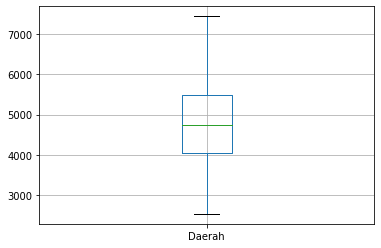

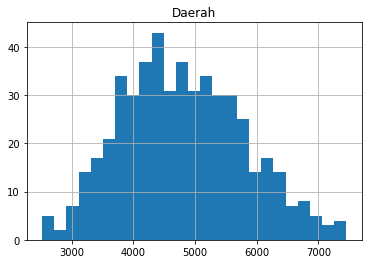

In [7]:
print(df.boxplot(column = [df.columns[1]]))
print(df.hist(column = [df.columns[1]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Daerah" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, condong lebih dekat pada "minimum".
Sehingga dapat disimpulkan bahwa data ini memiliki skew positif, dapat divisualisasikan pada histogram yang memiliki frekuensi data lebih berat di bagian kiri.

### Sumbu Utama

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586A9B5B08>]]


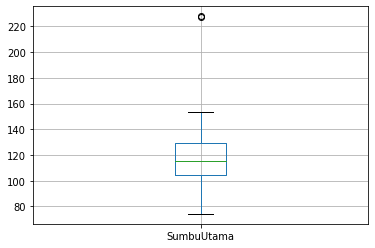

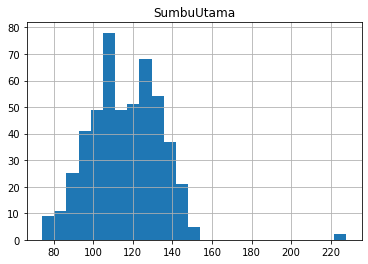

In [8]:
print(df.boxplot(column = [df.columns[2]]))
print(df.hist(column = [df.columns[2]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "SumbuKecil" ini tidak jauh dari distribusi normal.
Data ini juga mempunyai pencilan pada kedua sisi, sesuai dengan definisi data distribusi normal yang umumnya memiliki 0.35 persen pencilan pada kedua sisi.
Dapat disimpulkan bahwa kolom ini paling dekat dengan bentuk distribusi normal, dapat divisualisasikan dalam histogram.
Sehingga dapat disimpulkan bahwa data ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum"
Dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di kiri dan kanan (tidak memperhitungkan pencilan).

### Sumbu Kecil

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586AB6EC88>]]


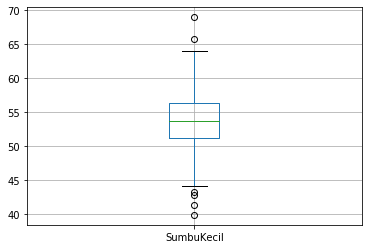

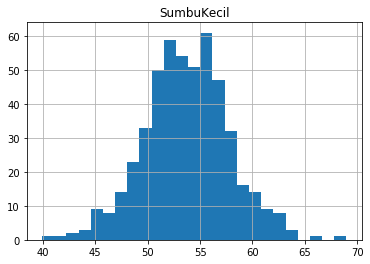

In [9]:
print(df.boxplot(column = [df.columns[3]]))
print(df.hist(column = [df.columns[3]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "SumbuKecil" ini tidak jauh dari distribusi normal.
Data ini juga mempunyai pencilan pada kedua sisi, sesuai dengan definisi data distribusi normal yang umumnya memiliki 0.35 persen pencilan pada kedua sisi.
Dapat disimpulkan bahwa kolom ini paling dekat dengan bentuk distribusi normal, dapat divisualisasikan dalam histogram.
Sehingga dapat disimpulkan bahwa data ini memiliki skew mendekati 0, karena median kurang lebih berada di tengah "minimum" dan "maksimum"
Dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di kiri dan kanan (tidak memperhitungkan pencilan).

### Keunikan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586ACA9B88>]]


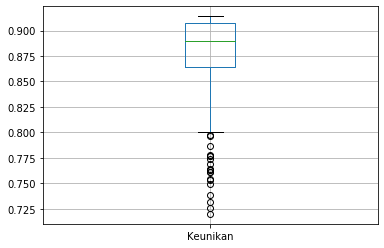

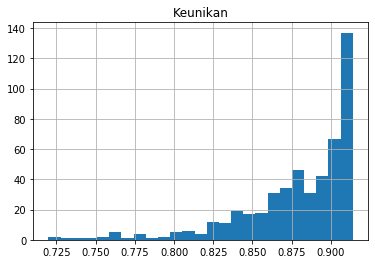

In [10]:
print(df.boxplot(column = [df.columns[4]]))
print(df.hist(column = [df.columns[4]], bins=25))

Dilihat dari boxplot, nilai "maximum" data tidak sama dengan Q3 + 1.5*IQR, serta memiliki pencilan sangat banyak dibawah nilai "minimum".
Data kolom "Keunikan" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada "maksimum" juga menggambarkan skew bernilai negatif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kanan.

### Area Bulatan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586A596E48>]]


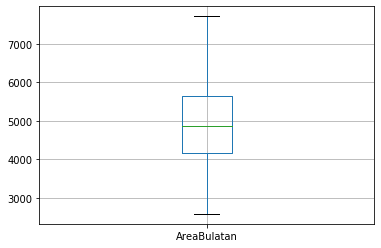

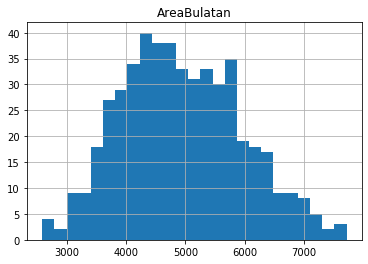

In [11]:
print(df.boxplot(column = [df.columns[5]]))
print(df.hist(column = [df.columns[5]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "AreaBulatan" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, condong lebih dekat pada "minimum".
Sehingga dapat disimpulkan bahwa data ini memiliki skew positif, 
dapat divisualisasikan pada histogram yang memiliki frekuensi data lebih berat di bagian kiri.

### Diameter

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586AB617C8>]]


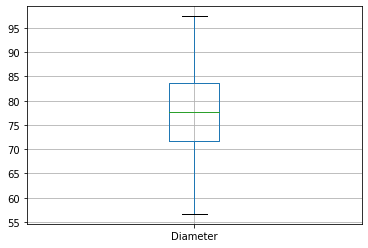

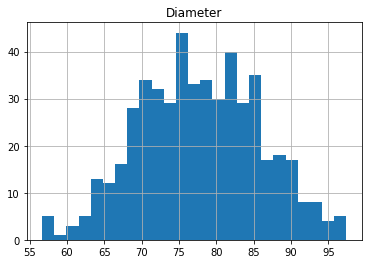

In [12]:
print(df.boxplot(column = [df.columns[6]]))
print(df.hist(column = [df.columns[6]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Diameter" ini mendekati distribusi normal.
Dapat dilihat pula nilai median, ditunjukkan pada garis hijau pada boxplot, memiliki jarak yang sama ke "minimum" dan "maksimum"..
Sehingga dapat disimpulkan bahwa data ini memiliki skew yang dekat dengan 0, 
dapat divisualisasikan pada histogram yang memiliki frekuensi data seimbang di bagian kiri dan kanan.

### KadarAir

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586A861408>]]


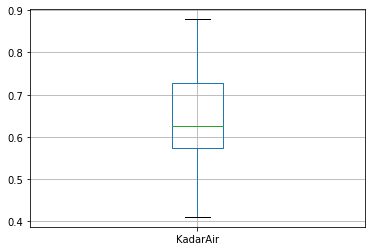

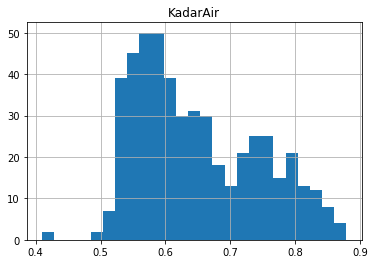

In [13]:
print(df.boxplot(column = [df.columns[7]]))
print(df.hist(column = [df.columns[7]], bins=25))

Dilihat dari boxplot, nilai median data jauh lebih dekat pada Q1 dibanding Q3.
Data yang terlihat terpisah pada histogram bagian kiri juga tidak dihitung sebagai pencilan karena memiliki frekuensi cukup besar.
Data kolom "KadarAir" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada Q1 juga menggambarkan skew bernilai positif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri.

### Keliling

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586AB27208>]]


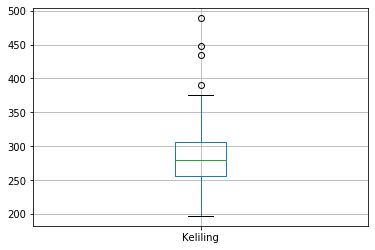

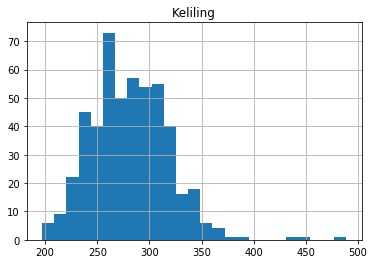

In [14]:
print(df.boxplot(column = [df.columns[8]]))
print(df.hist(column = [df.columns[8]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Keliling" ini mendekati distribusi normal.
Data ini juga memiliki pencilan karena terdapat data bernilai di atas "maksimum" dengan frekuensi signifikan.
Nilai median yang lebih dekat pada "minimum" juga menggambarkan skew bernilai positif.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri (tidak memperhitungkan pencilan).

### Bulatan

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586AC3A5C8>]]


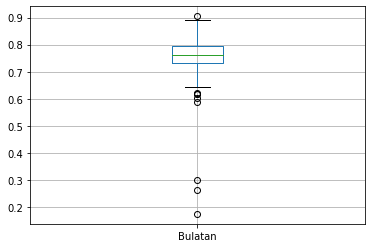

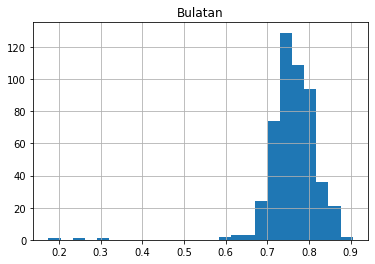

In [19]:
print(df.boxplot(column = [df.columns[9]]))
print(df.hist(column = [df.columns[9]], bins=25))

Dilihat dari boxplot, jangkauan antara "minimum" dan "maximum" kurang lebih sama dengan empat kali Inter Quartil Range.
Sehingga data kolom "Bulatan" ini mendekati distribusi normal.
Data ini juga memiliki pencilan karena terdapat data di atas "maksimum" dan di bawah "minimum" dengan lebih dominan yang di bawah.
Nilai median yang lebih dekat pada "minimum" juga menggambarkan skew bernilai positif.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kiri (tidak memperhitungkan pencilan).

### Ransum

AxesSubplot(0.125,0.125;0.775x0.755)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000002586AF0A9C8>]]


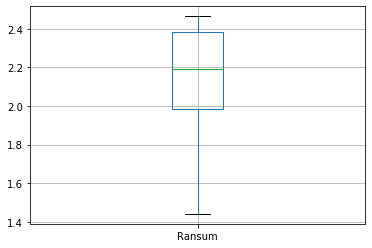

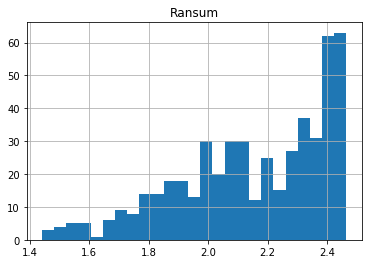

In [16]:
print(df.boxplot(column = [df.columns[10]]))
print(df.hist(column = [df.columns[10]], bins=25))

Dilihat dari boxplot, nilai "maximum" data tidak sama dengan Q3 + 1.5*IQR, serta memiliki pencilan sangat banyak dibawah nilai "minimum".
Data kolom "Ransum" ini jauh dari distribusi normal.
Nilai median yang jauh lebih dekat pada "maksimum" juga menggambarkan skew bernilai negatif dan jauh dari 0.
Dapat divisualisasikan pada histogram yang memiliki frekuensi lebih berat pada bagian kanan.

Histogram dan Boxplot semua kolom data:


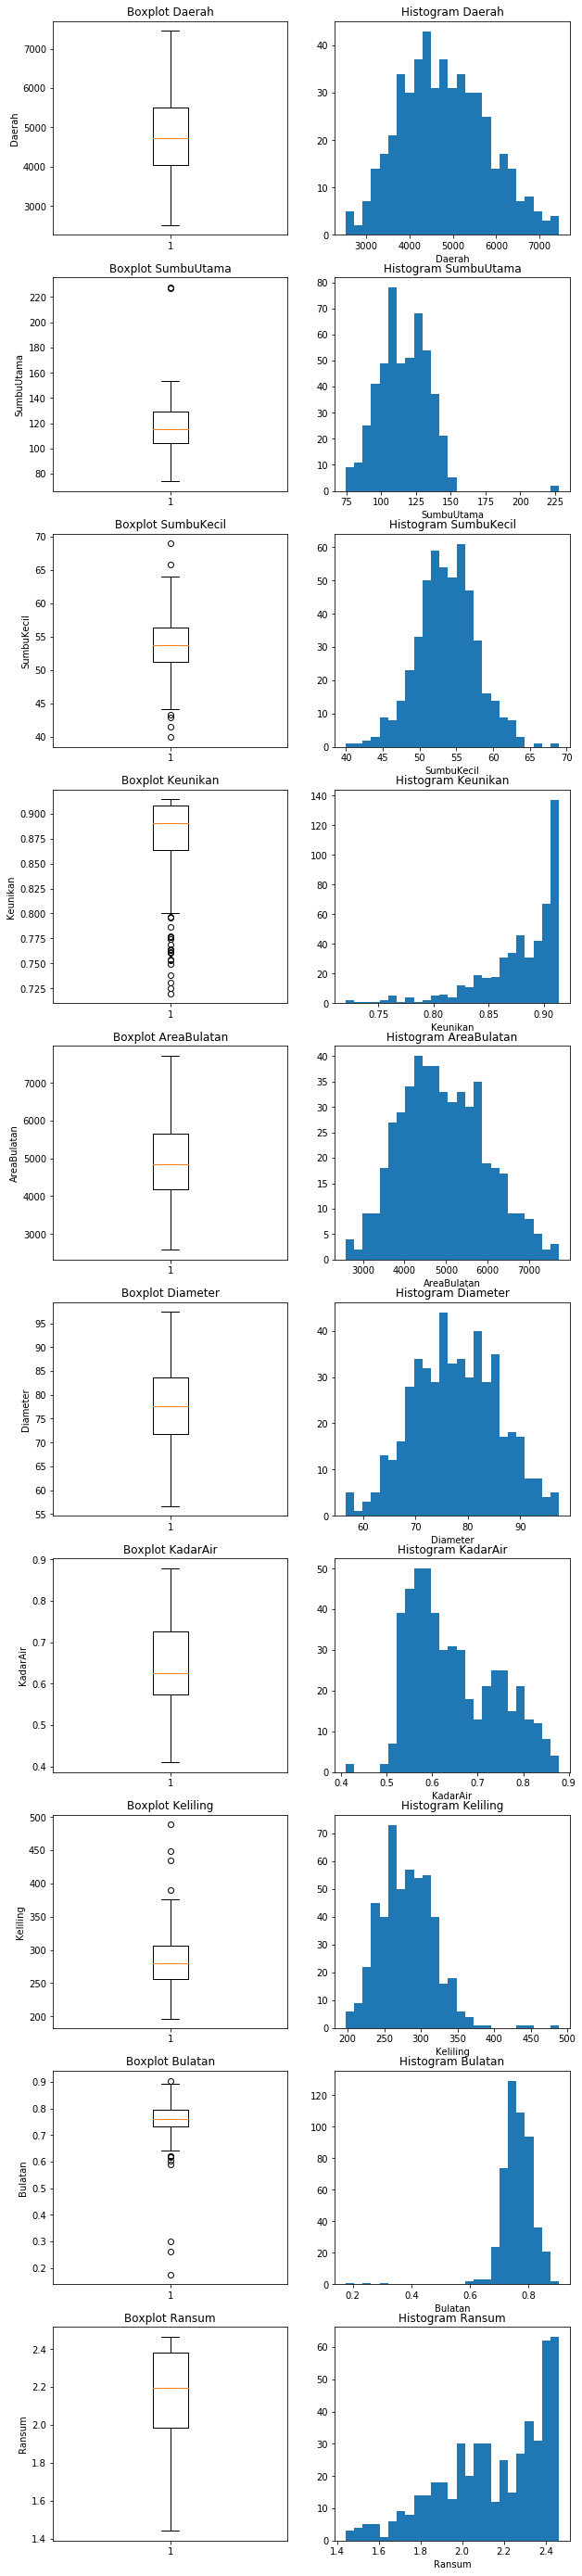

In [21]:
fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(10,50))
for i in range (10):
    ax[i][0].boxplot(df[df.columns[i+1]])
    ax[i][0].set_title("Boxplot "+df.columns[i+1])
    ax[i][0].set_ylabel(df.columns[i+1])
    ax[i][1].hist(x = df[df.columns[i+1]], bins=25)
    ax[i][1].set_title("Histogram "+df.columns[i+1])
    ax[i][1].set_xlabel(df.columns[i+1])
print("Histogram dan Boxplot semua kolom data:")
plt.show()

# Nomor 3

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test
yang dikaitkan dengan histogram plot.

Normality test dilakukan dengan menggunakan fungsi ```normaltest``` dari library scipy. Implementasi normality test jenis ini didasarkan pada **D'Agostino-Pearson Test**. 

Tes D'Agostino-Pearson, atau disebut juga Omnibus D'Agostino, dilakukan dengan menggabungkan hasil tes skewness dan kurtosis D'Agostino. Rumusnya diberikan sebagai berikut:$$K^2 = Z_s^2 + Z_k^2$$

$Z_s^2$ adalah z-score dari tes skewness D'Agostino dan $Z_k^2$ adalah z-score dari tes kurtosis D'Agostino. Jika hipotesis null terbukti, $K^2$ diaproksimasi terdistribusi chi-squared dengan derajat kebebasan 2.

Dalam soal ini, diambil hipotesis null ($H_0$) yaitu data terdistribusi normal. $H_0$ diuji dengan membandingkan nilai $\alpha$ yang ditetapkan sebesar 0.05 dengan p-value yang didapat dari ```normaltest```. $H_0$ akan diterima jika p-value lebih besar dari $\alpha$ dan akam ditolak jika p-value lebih kecil dari $\alpha$.

Untuk membantu pembuktian hasil normality test, ditampilkan pula histogram distribusi data dengan fungsi ```distplot``` dari library seaborn. Data yang terdistribusi normal akan menghasilkan histogram berbentuk kurva simetris (bell curve).

In [30]:
def normality_test(df):
    k2, p = normaltest(df)
    print("P-value yang didapat sebesar", p)
    if (p < 0.05):
        print("Hipotesis nol ditolak. Data tidak terdistribusi normal.")
    else:
        print("Hipotesis nol diterima. Data terdistribusi normal.")
    sns.distplot(df)

### Daerah

P-value yang didapat sebesar 0.004386271773193838
Hipotesis nol ditolak. Data tidak terdistribusi normal.


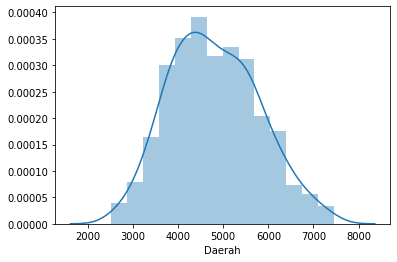

In [31]:
normality_test(df["Daerah"])

### SumbuUtama

P-value yang didapat sebesar 2.2127429343273333e-21
Hipotesis nol ditolak. Data tidak terdistribusi normal.


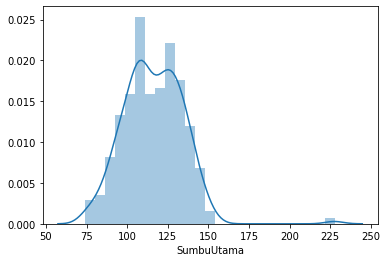

In [32]:
normality_test(df["SumbuUtama"])

### SumbuKecil

P-value yang didapat sebesar 0.1573634413290252
Hipotesis nol diterima. Data terdistribusi normal.


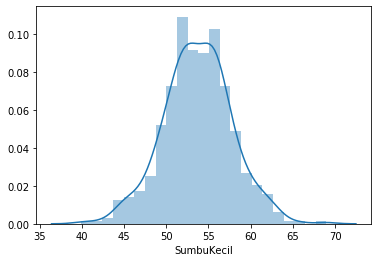

In [33]:
normality_test(df["SumbuKecil"])

### Keunikan

P-value yang didapat sebesar 3.602971140062405e-35
Hipotesis nol ditolak. Data tidak terdistribusi normal.


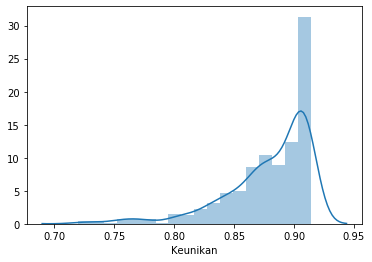

In [34]:
normality_test(df["Keunikan"])

### AreaBulatan

P-value yang didapat sebesar 0.004657058890055043
Hipotesis nol ditolak. Data tidak terdistribusi normal.


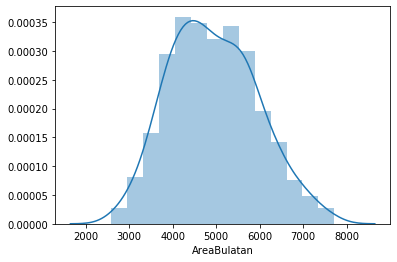

In [35]:
normality_test(df["AreaBulatan"])

### Diameter

P-value yang didapat sebesar 0.024157198077543095
Hipotesis nol ditolak. Data tidak terdistribusi normal.


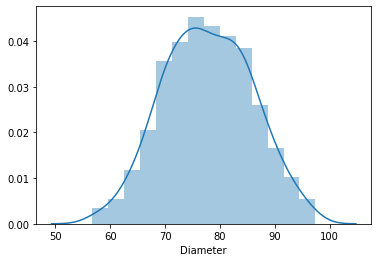

In [36]:
normality_test(df["Diameter"])

### KadarAir

P-value yang didapat sebesar 2.5869363404624707e-11
Hipotesis nol ditolak. Data tidak terdistribusi normal.


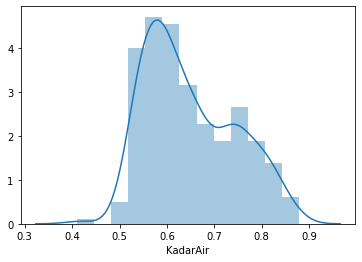

In [37]:
normality_test(df["KadarAir"])

### Keliling

P-value yang didapat sebesar 2.2390130437166565e-15
Hipotesis nol ditolak. Data tidak terdistribusi normal.


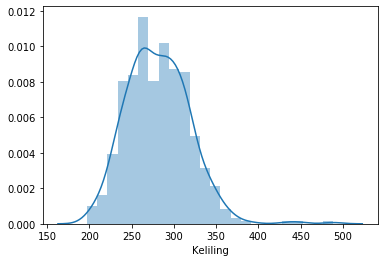

In [38]:
normality_test(df["Keliling"])

### Bulatan

P-value yang didapat sebesar 9.885276103161724e-97
Hipotesis nol ditolak. Data tidak terdistribusi normal.


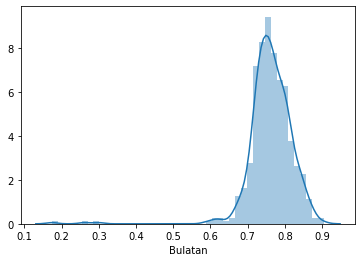

In [39]:
normality_test(df["Bulatan"])

### Ransum

P-value yang didapat sebesar 8.963008041823752e-09
Hipotesis nol ditolak. Data tidak terdistribusi normal.


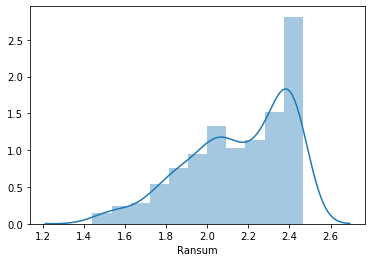

In [40]:
normality_test(df["Ransum"])

# Nomor 5